####Loading the dataset

In [75]:
import pandas as pd

data_set = pd.read_csv("/content/Loan_default.csv")

data_set.head(10)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
5,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
6,H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0
7,0HGZQKJ36W,56,126802,155511,531,67,4,8.15,60,0.43,PhD,Full-time,Married,No,No,Home,Yes,0
8,1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
9,CM9L1GTT2P,40,132784,228510,480,114,4,9.09,48,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,0


####Checking class imbalance

In [76]:
num_class = data_set['Default'].value_counts()
print(num_class)

percentage_num_class = data_set['Default'].value_counts(normalize=True) * 100
print(percentage_num_class)

Default
0    225694
1     29653
Name: count, dtype: int64
Default
0    88.387175
1    11.612825
Name: proportion, dtype: float64


####Train Test Split

In [77]:
from sklearn.model_selection import train_test_split

X = data_set.drop(['Default', 'LoanID'], axis=1)
y = data_set['Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head(10)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
137187,18,137576,209136,846,26,2,10.47,60,0.81,High School,Self-employed,Single,Yes,No,Business,No
230334,47,57194,5970,748,30,2,19.72,36,0.73,High School,Unemployed,Divorced,No,Yes,Education,No
19687,26,84328,95065,453,7,2,24.25,12,0.45,Master's,Self-employed,Married,No,No,Other,Yes
106509,53,49795,229582,533,107,3,14.44,60,0.17,Bachelor's,Self-employed,Single,Yes,No,Auto,Yes
242291,49,115450,22072,840,0,4,24.48,12,0.11,Bachelor's,Part-time,Single,No,Yes,Education,Yes
104667,33,44855,39393,416,80,4,16.25,12,0.76,Bachelor's,Unemployed,Single,No,No,Other,Yes
56486,22,20216,153128,692,90,4,22.91,60,0.32,High School,Self-employed,Married,No,Yes,Auto,No
225559,57,90343,71189,345,102,4,12.98,12,0.71,Bachelor's,Unemployed,Married,No,Yes,Other,Yes
154022,49,35880,96919,353,33,2,10.97,24,0.31,PhD,Self-employed,Divorced,Yes,No,Other,Yes
62609,19,71995,23105,587,105,2,2.06,12,0.38,High School,Unemployed,Divorced,No,Yes,Other,Yes


In [78]:
df = pd.DataFrame(data_set)
df.nunique()

,0
LoanID,255347
Age,52
Income,114620
LoanAmount,158729
CreditScore,550
MonthsEmployed,120
NumCreditLines,4
InterestRate,2301
LoanTerm,5
DTIRatio,81


####One-Hot Encoding Categorical Variables that has lower unique values

In [79]:
from sklearn.preprocessing import OneHotEncoder

oh_categorical_cols = ['EmploymentType', 'MaritalStatus', 'LoanPurpose']

oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
train_ohe_encoded_cols = oh_encoder.fit_transform(X_train[oh_categorical_cols])
test_ohe_encoded_cols = oh_encoder.transform(X_test[oh_categorical_cols])

feature_names = oh_encoder.get_feature_names_out(oh_categorical_cols)

ohe_encoded_train_df = pd.DataFrame(train_ohe_encoded_cols, columns=feature_names, index=X_train.index)
ohe_encoded_test_df = pd.DataFrame(test_ohe_encoded_cols, columns=feature_names, index=X_test.index)

X_train_org = X_train.drop(columns=oh_categorical_cols)
X_test_org = X_test.drop(columns=oh_categorical_cols)

train_ohe_final = pd.concat([X_train_org, ohe_encoded_train_df], axis=1)
test_ohe_final = pd.concat([X_test_org, ohe_encoded_test_df], axis=1)

####Ordinal Encoding Categorical Variables that has higher unique values

In [80]:
from sklearn.preprocessing import OrdinalEncoder

ode_encoder = OrdinalEncoder()

train_ode_encoded_cols = ode_encoder.fit_transform(train_ohe_final[['Education']])
test_ode_encoded_cols = ode_encoder.transform(test_ohe_final[['Education']])

train_ode_final = train_ohe_final.copy()
train_ode_final['Education'] = train_ode_encoded_cols

test_ode_final = test_ohe_final.copy()
test_ode_final['Education'] = test_ode_encoded_cols

####Binary 0/1 Encoding Binary Catecorical Variables

In [81]:
train_ode_final['HasMortgage'] = X_train['HasMortgage'].map({'Yes': 1, 'No': 0})
test_ode_final['HasMortgage'] = X_test['HasMortgage'].map({'Yes': 1, 'No': 0})

train_ode_final['HasDependents'] = X_train['HasDependents'].map({'Yes': 1, 'No': 0})
test_ode_final['HasDependents'] = X_test['HasDependents'].map({'Yes': 1, 'No': 0})

train_ode_final['HasCoSigner'] = X_train['HasCoSigner'].map({'Yes': 1, 'No': 0})
test_ode_final['HasCoSigner'] = X_test['HasCoSigner'].map({'Yes': 1, 'No': 0})

for col in ['HasMortgage', 'HasDependents', 'HasCoSigner']:
    train_ode_final[col] = train_ode_final[col].fillna(0)
    test_ode_final[col]  = test_ode_final[col].fillna(0)

print(train_ode_final['HasMortgage'].value_counts(dropna=False))

HasMortgage
1    102145
0    102132
Name: count, dtype: int64


####Imputing Missing Values

In [82]:
from sklearn.impute import SimpleImputer

X_train_final = train_ode_final
X_test_final = test_ode_final

imputer = SimpleImputer(strategy='mean')

X_train_imputed = imputer.fit_transform(X_train_final)
X_test_imputed = imputer.transform(X_test_final)

In [83]:
print(X_train_imputed.shape[0], y_train.shape[0])

204277 204277


In [155]:
print("Train shapes:", X_train_final.shape, y_train.shape)
print("Train imputed:", X_train_imputed.shape)

Train shapes: (204277, 25) (204277,)
Train imputed: (204277, 25)


####Model Training

In [137]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42, objective="binary:logistic", tree_method="hist",
                          eval_metric="aucpr", learning_rate=0.01, n_estimators=5000, max_depth=8,
                          min_child_weight=2, subsample=0.95, colsample_bytree=0.95, gamma=0.5, reg_alpha=0.1, reg_lambda=2.0)

xgb_model.fit(X_train_imputed, y_train, verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.95, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              feature_weights=None, gamma=0.5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=2, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=5000,
              n_jobs=None, num_parallel_tree=None, ...)

####Mesuearing Accuracy

In [138]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, balanced_accuracy_score
import numpy as np

preds = xgb_model.predict_proba(X_test_imputed)[:, 1]
thresholds = np.linspace(0.05, 0.95, 19)

def evaluate_model(threshold):
  pred = (preds >= threshold).astype(int)
  return {"threshold":  threshold, "accuracy score": accuracy_score(y_test, pred), "balance_score": balanced_accuracy_score(y_test, pred),
          "f1 score": f1_score(y_test, pred), "confusion metric": confusion_matrix(y_test, pred), "classification report": classification_report(y_test, pred, zero_division=0)}

scores = [evaluate_model(t) for t in thresholds]
best = max(scores, key=lambda x: x["f1 score"])
print(best)

print("Best threshold: ", best["threshold"])
print("Best accuracy score: ", best["accuracy score"])
print("Best balance score: ", best["balance_score"])
print("Best f1 score: ", best["f1 score"])
print("Best Confusion metric: ", best["confusion metric"])
print("classification report: ", best["classification report"])

{'threshold': np.float64(0.2), 'accuracy score': 0.8261405913452124, 'balance_score': np.float64(0.6490791285651569), 'f1 score': 0.3575718110122278, 'confusion metric': array([[39720,  5450],
       [ 3429,  2471]]), 'classification report': '              precision    recall  f1-score   support\n\n           0       0.92      0.88      0.90     45170\n           1       0.31      0.42      0.36      5900\n\n    accuracy                           0.83     51070\n   macro avg       0.62      0.65      0.63     51070\nweighted avg       0.85      0.83      0.84     51070\n'}
Best threshold:  0.2
Best accuracy score:  0.8261405913452124
Best balance score:  0.6490791285651569
Best f1 score:  0.3575718110122278
Best Confusion metric:  [[39720  5450]
 [ 3429  2471]]
classification report:                precision    recall  f1-score   support

           0       0.92      0.88      0.90     45170
           1       0.31      0.42      0.36      5900

    accuracy                           

In [139]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, preds)
print("ROC AUC:", auc)

ROC AUC: 0.7483884609178884


In [140]:
best_acc = max(scores, key=lambda x: x["accuracy score"])
print("Threshold for max accuracy:", best_acc["threshold"])
print("Accuracy:", best_acc["accuracy score"])

Threshold for max accuracy: 0.49999999999999994
Accuracy: 0.8877227335030351


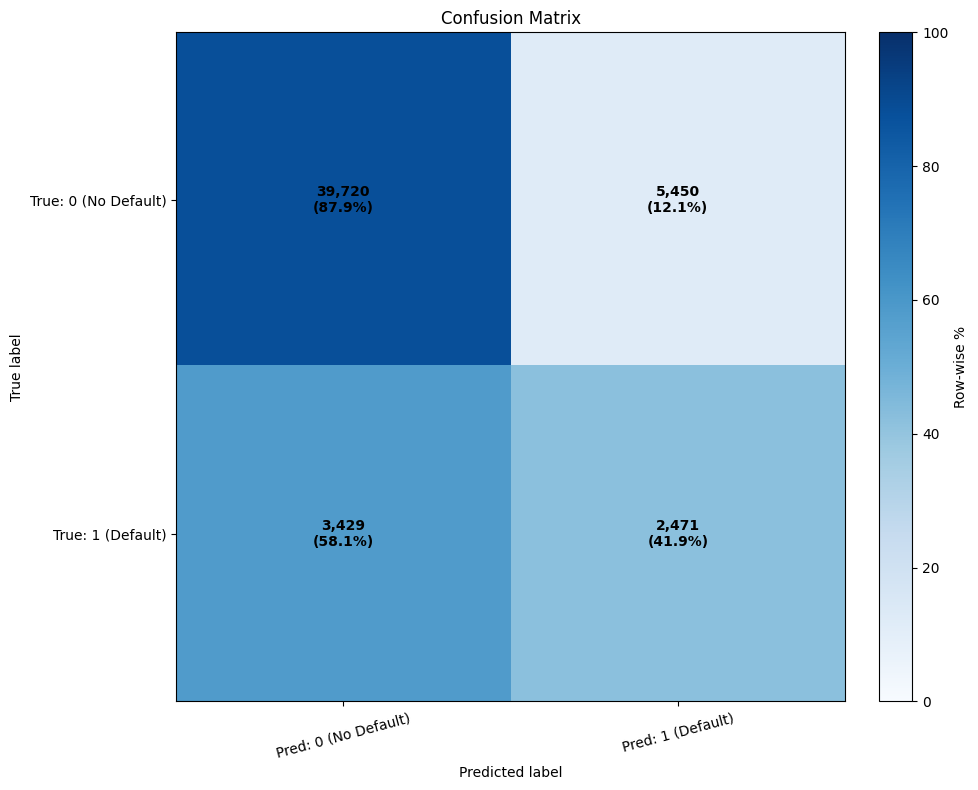

In [152]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

threshold = 0.2
y_preds = (preds >= threshold).astype(int)
cm = confusion_matrix(y_test, y_preds)
cm_counts = cm.astype(int)

row_sums = cm.sum(axis=1, keepdims=True)
cm_percentages = np.divide(cm_counts, row_sums, where=row_sums!=0) * 100.0

fig, ax =plt.subplots(figsize=(10, 8))
im = ax.imshow(cm_percentages, interpolation='nearest', cmap=plt.cm.Blues, vmin=0, vmax=100)


ax.set_title("Confusion Matrix")
ax.set_xticks([0, 1]); ax.set_xticklabels(['Pred: 0 (No Default)', 'Pred: 1 (Default)'], rotation=15)
ax.set_yticks([0, 1]); ax.set_yticklabels(['True: 0 (No Default)', 'True: 1 (Default)'])

for i in range(cm_counts.shape[0]):
    for j in range(cm_counts.shape[1]):
        ax.text(
            j, i,
            f'{cm_counts[i, j]:,}\n({cm_percentages[i, j]:.1f}%)',
            ha='center', va='center',
            color='black', fontsize=10, fontweight='bold'
        )

cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Row-wise %')

ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_ylim(1.5, -0.5)
plt.tight_layout()
fig.savefig('confusion_matrix.png')
plt.show()


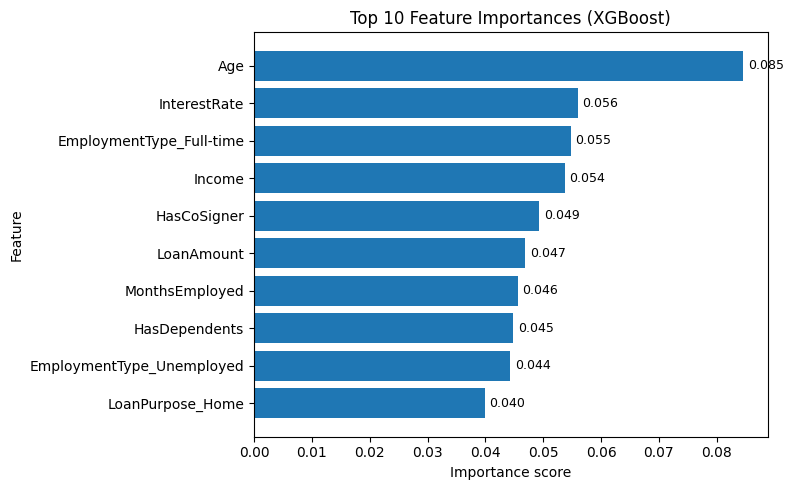

In [157]:
feature_names = X_train_final.columns

importances = xgb_model.feature_importances_

imp_series = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(10)

fi_fig = plt.figure(figsize=(8, 5))
bars = plt.barh(imp_series.index[::-1], imp_series.values[::-1], color='#1f77b4')
plt.title('Top 10 Feature Importances (XGBoost)')
plt.xlabel('Importance score')
plt.ylabel('Feature')

for bar in bars:
    w = bar.get_width()
    plt.text(w + max(imp_series.values) * 0.01, bar.get_y() + bar.get_height()/2,
             f'{w:.3f}', va='center', fontsize=9)

plt.tight_layout()
fi_fig.savefig('feature_importance_fig.png')
plt.show()